***TURN PHOTOS INTO CARTOONS USING PYTHON***



1.   Load Image
2.   Create edge mask
3.   Reduce the color palette
4.   Combine edge mask with the colored image






In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

 **LOAD IMAGE**

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img

In [ ]:
def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

**CREATE EDGE MASK**

In [ ]:
def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

**Upload Image File**

Saving benedict-cumberbatch-doctor-strange.jpg to benedict-cumberbatch-doctor-strange.jpg


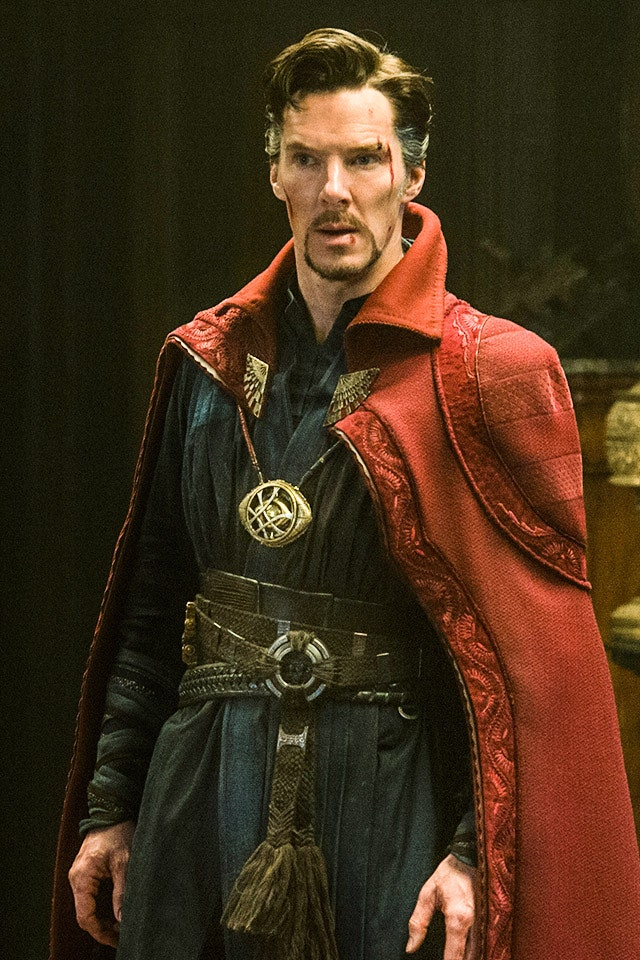

In [ ]:
uploaded = files.upload()

filename = next(iter(uploaded))
img = read_file(filename)

**Create Cartoon Effect**

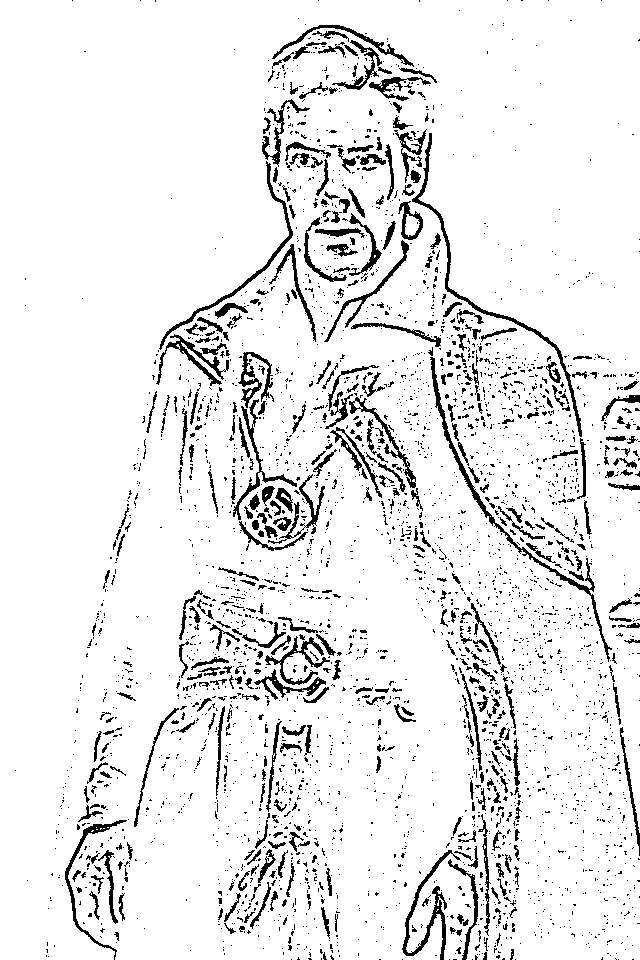

In [ ]:
line_size  = 7 #@param {type:"slider", min:1, max:10, step:2}
blur_value = 5 #@param {type:"slider", min:1, max:10, step:2}

edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)

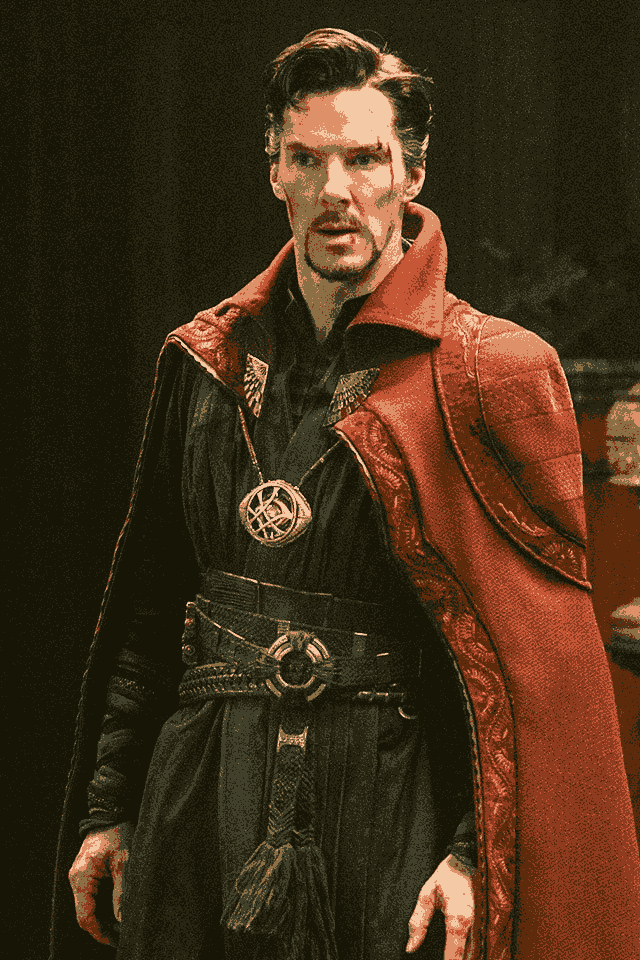

In [ ]:
total_color = 9 #@param {type:"slider", min:1, max:10, step:2}

img = color_quantization(img, total_color)
cv2_imshow(img)

**Bilateral Filter**

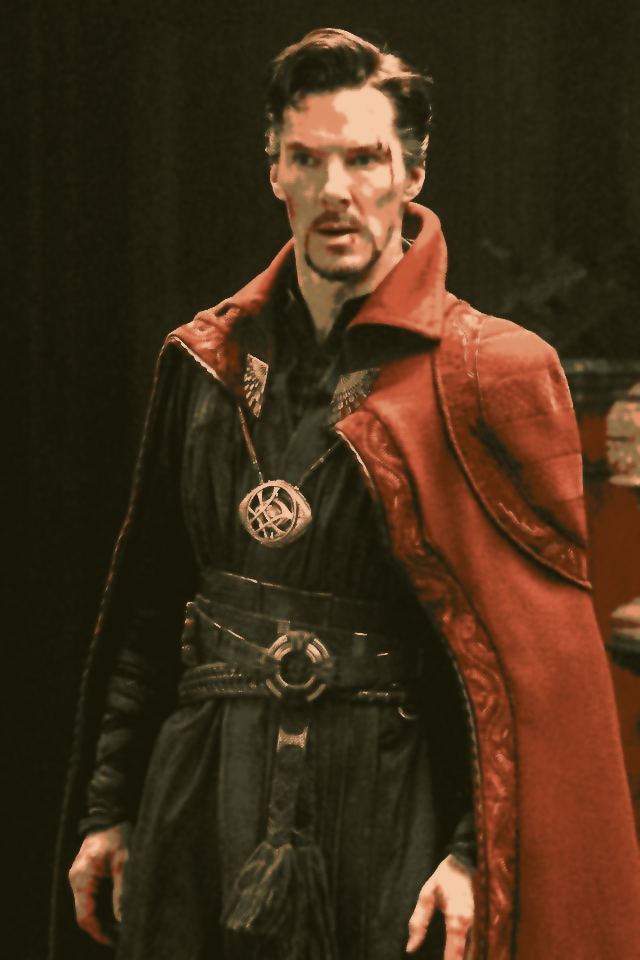

In [ ]:
d=7 #@param {type:"slider", min:1, max:10, step:2}
blurred = cv2.bilateralFilter(img, d=d, sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)

**Combine Edge Mask with the Colored Image**

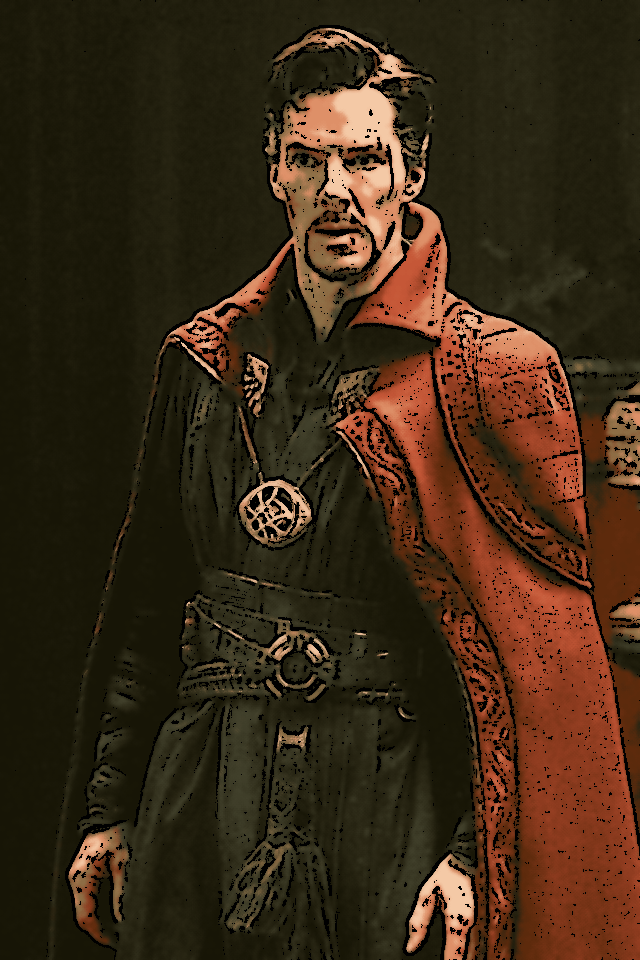

In [ ]:
cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)

# New Section

Saving download.jpg to download.jpg


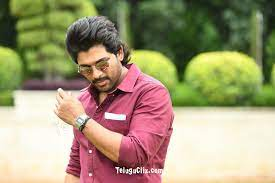

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files


def read_file(filename):
  img = cv2.imread(filename)
  cv2_imshow(img)
  return img


def color_quantization(img, k):
# Transform the image
  data = np.float32(img).reshape((-1, 3))

# Determine criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)

# Implementing K-Means
  ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

def edge_mask(img, line_size, blur_value):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_blur = cv2.medianBlur(gray, blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, line_size, blur_value)
  return edges

uploaded = files.upload()

filename = next(iter(uploaded))
img = read_file(filename)



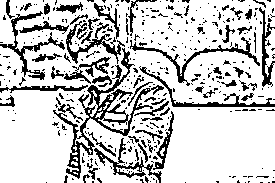

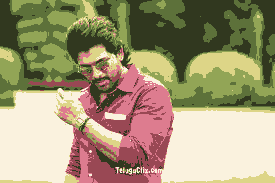

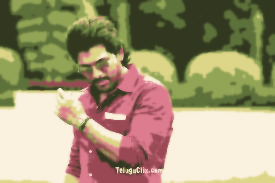

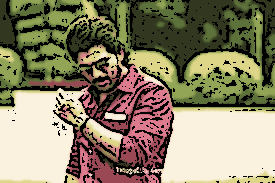

In [ ]:

#cartoon effect

line_size  = 5 #@param {type:"slider", min:1, max:10, step:2}
blur_value = 3 #@param {type:"slider", min:1, max:10, step:2}

edges = edge_mask(img, line_size, blur_value)
cv2_imshow(edges)


total_color = 7 #@param {type:"slider", min:1, max:10, step:2}

color_quantization = color_quantization(img, total_color)
cv2_imshow(color_quantization)


d=5 #@param {type:"slider", min:1, max:10, step:2}
blurred = cv2.bilateralFilter(color_quantization, d=d, sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)

cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)
cv2_imshow(cartoon)



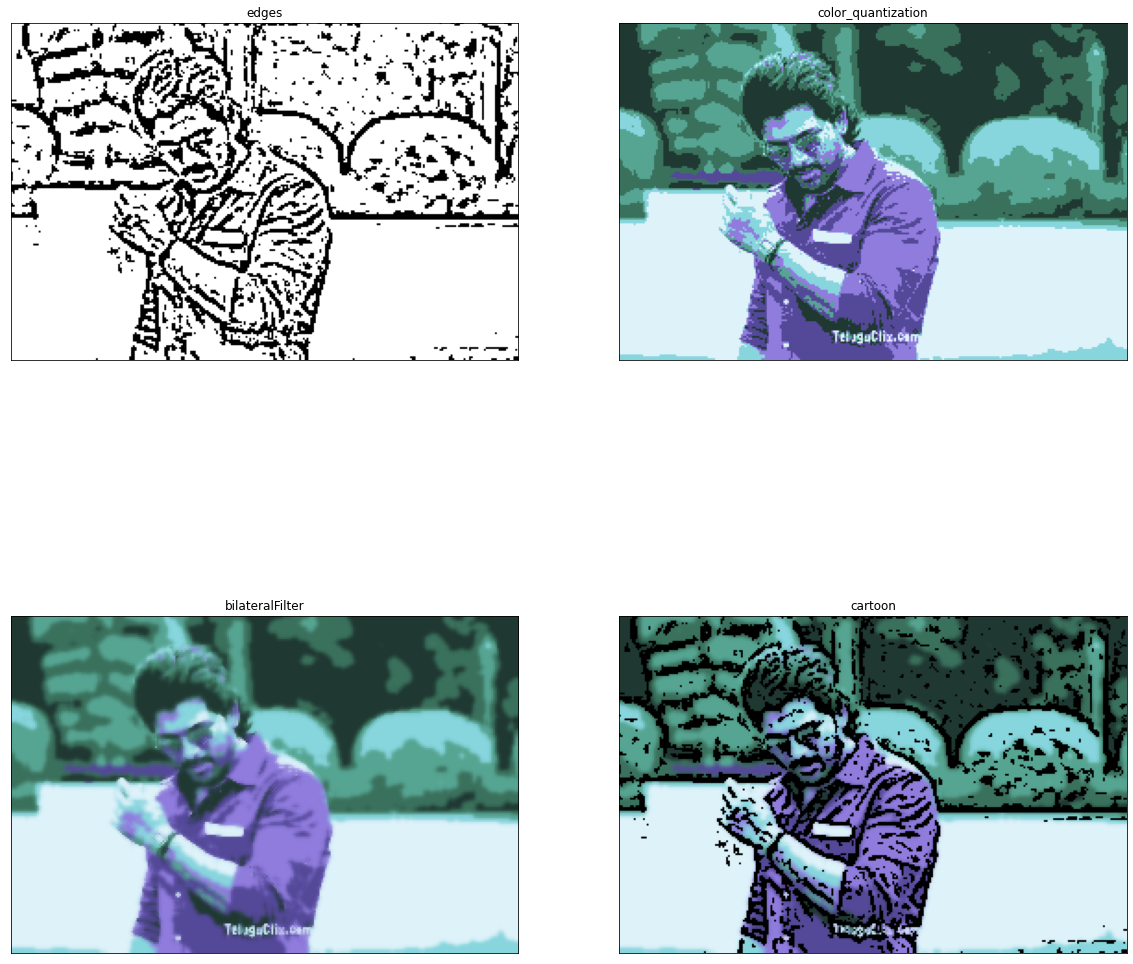

In [ ]:
import matplotlib.pylab as plt

plt.figure(figsize=([20, 20]))
plt.subplot(221),plt.imshow(edges, cmap = 'gray')
plt.title('edges'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(color_quantization, cmap = 'gray')
plt.title('color_quantization'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(blurred)
plt.title('bilateralFilter'), plt.xticks([]), plt.yticks([])
# cartoon = cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)
# cartoon = np.array(cartoon)
plt.subplot(224),plt.imshow(cartoon)
plt.title('cartoon'), plt.xticks([]), plt.yticks([])
plt.show()